# Configuration

## Featurization of Text

Two approaches to featurize text:- 
    
    1. Count Vectorizer (Only Unigrams)
    2. Tfidf Vectorizer

## Modeling

Fit the following 5 models on the given text data and would choose the best one:-
    
    1. Naive Bayes
    2. Logistic Regression
    3. Linear SVM
    4. GBDT
    5. Random Forest

For each of the above models, we would do hyperparameter tuning.

# Observations from Results
    
- We tried two types of featuring techniques, _CountVectorizer_, _TFIDFVectorizer_ with only __Unigram__ Model
- We applied both the above mentioned Featur Engineering techniques to 5 Classical ML Models, 
    - _Naive Bayes_
    - _Logistic Regression_
    - _Linear SVM_
    - _Gradient Boosted DT_
    - _Random Forest_
- We have divided the dataset into _train/test split_ of __75/25__ and applied __5 fold__ _CrossValidation_ while doing Grid Search for Hyper Parameter tuning.
- Results shows very __low/poor__ _performance_ by almost all the models in binary classification task in terms of standard perfomance measures.
- One of the main reason of such poor performance is the __size of dataset__.
- Average _F1 Score_ across all the model remian between __0.60 - 0.66__ with highest _Accuracy_ of __~70%__ using _CountVectorizer_ on _GBDT_ Model.

# PreProcessing (Preparation of training data)

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack

## Importing the PreProcessed Data

In [2]:
# Importing the preprocessed_data

preprocessed_data = pd.read_csv("../data/preprocessed_with_vader_score.csv")

preprocessed_data.head()

,worker_id,processed_text,processed_text_len,vader_neg,vader_neu,vader_pos,vader_compound,sentiment
0,XYNN2Y4VCF3G,bought 2200 ico 050 coin hold sold 3 months ag...,71,0.000,1.000,0.000,0.0000,Positive
1,DR6XNZMT9KRH,harmony algorand cardano solana vechain gonna ...,80,0.000,0.803,0.197,0.4019,Positive
2,9FCQGMYD4A42,honestly reading post responses conclude crypt...,171,0.218,0.567,0.215,-0.0222,Negative
3,QEZAEMV2WF9D,bear market money continue dca assets believe,45,0.000,0.779,0.221,0.1779,Positive
4,Z7J7W3XCP4XC,funny people think bitcoins risk comparable st...,105,0.180,0.670,0.149,0.1027,Negative


In [3]:
preprocessed_data.fillna('', inplace=True)

# Checking for no preprocessed text
def check_no_preprocessed_text(df):
    return [i for i in range(len(df)) if len(str(df.iloc[i,1]).split())==0]

# Calling the function check_no_preprocessed_text to check the index which has no text

list_of_indices = check_no_preprocessed_text(preprocessed_data)

list_of_indices

[]

In [4]:
# Dropping the rows which has no text

preprocessed_data = preprocessed_data.drop(labels = list_of_indices, axis = 0)

preprocessed_data.shape

(552, 8)

In [5]:
# Checking whether there are two same texts in the data

duplicate_text = preprocessed_data[preprocessed_data.duplicated(subset = ['processed_text','sentiment'])]
duplicate_text

,worker_id,processed_text,processed_text_len,vader_neg,vader_neu,vader_pos,vader_compound,sentiment
362,KXDCJPTQAF2Q,bitcoin going win traditional finance obsolete...,110,0.101,0.596,0.303,0.6597,Positive
456,4A6NNREHP6AA,yup mega bullish dots canary chain kusama,41,0.000,1.000,0.000,0.0000,Positive


In [6]:
preprocessed_data = preprocessed_data.drop(labels=list(duplicate_text.index), axis=0)
preprocessed_data

,worker_id,processed_text,processed_text_len,vader_neg,vader_neu,vader_pos,vader_compound,sentiment
0,XYNN2Y4VCF3G,bought 2200 ico 050 coin hold sold 3 months ag...,71,0.000,1.000,0.000,0.0000,Positive
1,DR6XNZMT9KRH,harmony algorand cardano solana vechain gonna ...,80,0.000,0.803,0.197,0.4019,Positive
2,9FCQGMYD4A42,honestly reading post responses conclude crypt...,171,0.218,0.567,0.215,-0.0222,Negative
3,QEZAEMV2WF9D,bear market money continue dca assets believe,45,0.000,0.779,0.221,0.1779,Positive
4,Z7J7W3XCP4XC,funny people think bitcoins risk comparable st...,105,0.180,0.670,0.149,0.1027,Negative
...,...,...,...,...,...,...,...,...
547,FM9FYY27VTVR,lightning network capability millions btc tran...,72,0.000,1.000,0.000,0.0000,Positive
548,K94W3ATCZX2V,means daily volume means daily active users me...,80,0.000,0.636,0.364,0.7430,Positive
549,W7APN9XYDRV6,exchanges irresponsible list tokens luna shoul...,62,0.531,0.469,0.000,-0.7783,Negative
550,MTCJYTYKKHZJ,massive ecosystem pretty applications shitload...,693,0.043,0.726,0.231,0.9548,Positive


In [7]:
preprocessed_data['class'] = np.where(preprocessed_data['sentiment'] == 'Negative',0, 1)
preprocessed_data

,worker_id,processed_text,processed_text_len,vader_neg,vader_neu,vader_pos,vader_compound,sentiment,class
0,XYNN2Y4VCF3G,bought 2200 ico 050 coin hold sold 3 months ag...,71,0.000,1.000,0.000,0.0000,Positive,1
1,DR6XNZMT9KRH,harmony algorand cardano solana vechain gonna ...,80,0.000,0.803,0.197,0.4019,Positive,1
2,9FCQGMYD4A42,honestly reading post responses conclude crypt...,171,0.218,0.567,0.215,-0.0222,Negative,0
3,QEZAEMV2WF9D,bear market money continue dca assets believe,45,0.000,0.779,0.221,0.1779,Positive,1
4,Z7J7W3XCP4XC,funny people think bitcoins risk comparable st...,105,0.180,0.670,0.149,0.1027,Negative,0
...,...,...,...,...,...,...,...,...,...
547,FM9FYY27VTVR,lightning network capability millions btc tran...,72,0.000,1.000,0.000,0.0000,Positive,1
548,K94W3ATCZX2V,means daily volume means daily active users me...,80,0.000,0.636,0.364,0.7430,Positive,1
549,W7APN9XYDRV6,exchanges irresponsible list tokens luna shoul...,62,0.531,0.469,0.000,-0.7783,Negative,0
550,MTCJYTYKKHZJ,massive ecosystem pretty applications shitload...,693,0.043,0.726,0.231,0.9548,Positive,1


## Splitting Data into Training and Cross Validation sets

In [8]:
X = preprocessed_data[['processed_text','processed_text_len']]
Y = preprocessed_data['class']

In [9]:
# Importing the library
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, stratify = Y, random_state = 42)

In [10]:
X_train.shape, X_test.shape

((412, 2), (138, 2))

In [11]:
Y_train.value_counts()

1    220
0    192
Name: class, dtype: int64

In [12]:
Y_test.value_counts()

1    74
0    64
Name: class, dtype: int64

## Text Featurization

### CountVectorizer/BOW(Bag of Words)

In [13]:
# Countvectorizer or Bag of Words on unigrams

countvec = CountVectorizer(min_df=10, ngram_range = (1,1))
preprocessed_train_bow = countvec.fit_transform(X_train.processed_text.values)
print("Shape of the training data after fitting Countvectorizer ", preprocessed_train_bow.shape)

Shape of the training data after fitting Countvectorizer  (412, 95)


In [14]:
# Transforming the test data also

preprocessed_test_bow = countvec.transform(X_test.processed_text.values)
print("Shape of the test data after fitting Countvectorizer ", preprocessed_test_bow.shape)

Shape of the test data after fitting Countvectorizer  (138, 95)


### TFIDF Vectorizer

In [15]:
# Countvectorizer or Bag of Words on unigrams

tfidfvec = TfidfVectorizer(min_df=10, ngram_range = (1,1))
preprocessed_train_tfidf = tfidfvec.fit_transform(X_train.processed_text.values)
print("Shape of the training data after fitting Tfidfvectorizer ", preprocessed_train_tfidf.shape)

Shape of the training data after fitting Tfidfvectorizer  (412, 95)


In [16]:
# Transforming the test data also

#preprocessed_cv_tfidf = tfidfvec.transform(X_CV)
preprocessed_test_tfidf = tfidfvec.transform(X_test.processed_text.values)
print("Shape of the test data after fitting Tfidfvectorizer ",preprocessed_test_tfidf.shape)

Shape of the test data after fitting Tfidfvectorizer  (138, 95)


## Scaling of Numerical Features

In [17]:
minmax = MinMaxScaler()

prep_length_train = minmax.fit_transform(X_train.processed_text_len.values.reshape(-1,1))
prep_length_test  = minmax.transform(X_test.processed_text_len.values.reshape(-1,1))

## Final Feature Matrix

In [18]:
preprocessed_train_bow = hstack((preprocessed_train_bow,prep_length_train))
preprocessed_test_bow = hstack((preprocessed_test_bow,prep_length_test))
preprocessed_train_tfidf = hstack((preprocessed_train_tfidf,prep_length_train))
preprocessed_test_tfidf = hstack((preprocessed_test_tfidf,prep_length_test))

## Utility Functions

### Function to plot CONFUSION MATRIX along with PRECISION & RECALL Matrix

In [19]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 2,2 matrix, each cell (i,j) represents number of points of class i are predicted class j
    # The predictions are along the columns of the confusion matrix whereas the actual values are along the rows of confusion matrix.
    
    A =(((C.T)/(C.sum(axis=1))).T)
        
    B =(C/C.sum(axis=0))
        
    labels = [0,1]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    #print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(20,4))
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    #plt.show()

    #print("-"*50, "Precision matrix", "-"*50)
    #plt.figure(figsize=(10,5))
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    #plt.show()
    #print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    #print("-"*50, "Recall matrix"    , "-"*50)
    #plt.figure(figsize=(10,5))
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    #plt.show()
    #print("Sum of rows in Recall matrix",A.sum(axis=1))

### Function to Calculate Best Threshold & Predict with the Same

In [20]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

# Training -> Grid Search ->  Testing

## NAIVE BAYES
### Hyperparameter Tuning

    1. Hyperparameter tuning would be based on the parameter alpha which is additive or Laplace Smoothing parameter that prevents posteriors for unseen data points to become zero.
    2. The best hyperparameter would be choosen for the highest Recall.



### CountVectorizer/BOW(Bag of Words)

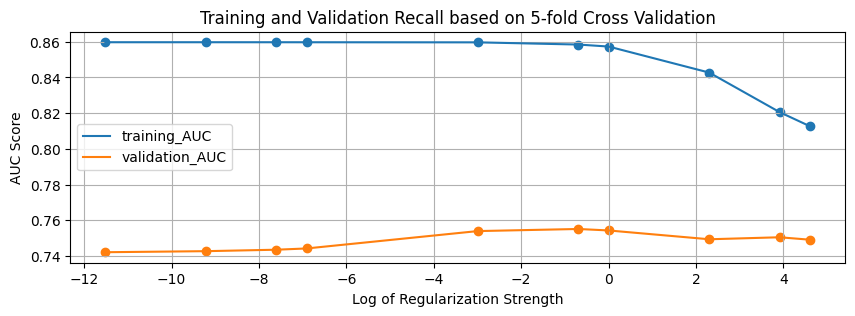

The best regularization strength parameter alpha on the random search over the given hyperparameter space for CountVectorizer is :  {'alpha': 0.5}


In [21]:
NB = MultinomialNB()
params = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

clf = RandomizedSearchCV(NB, param_distributions = params, scoring = 'roc_auc', cv=5, return_train_score = True, random_state = 42)
clf.fit(preprocessed_train_bow, Y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results.sort_values(by = "param_alpha", inplace=True)


train_recall = results["mean_train_score"]
train_std = results["std_train_score"]
cv_recall = results["mean_test_score"]
cv_std = results["std_test_score"]
hparam = pd.Series([np.log(x) for x in results.param_alpha.values])

plt.figure(figsize = (10,3))
plt.plot(hparam, train_recall, label = "training_AUC")
plt.plot(hparam, cv_recall, label = "validation_AUC")
plt.scatter(hparam, train_recall)
plt.scatter(hparam, cv_recall)
plt.xlabel("Log of Regularization Strength")
plt.ylabel("AUC Score")
plt.title("Training and Validation Recall based on 5-fold Cross Validation")
plt.legend()
plt.grid()
plt.show()

print("The best regularization strength parameter alpha on the random search " + 
      "over the given hyperparameter space for CountVectorizer is : ", clf.best_params_)
clf_nb_cbow_params = clf.best_params_

### TFIDF Vectorizer

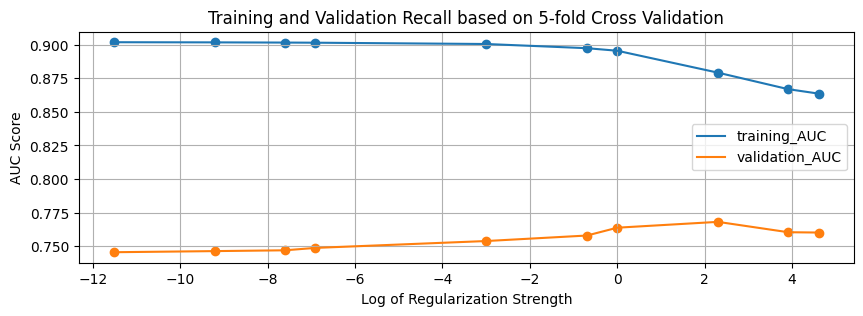

The best regularization strength parameter alpha on the random search over the given hyperparameter space for TFIDF Vectorizer is :  {'alpha': 10}


In [22]:
NB = MultinomialNB()
params = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

clf = RandomizedSearchCV(NB, param_distributions = params, scoring = 'roc_auc', cv=5, return_train_score = True, random_state = 42)
clf.fit(preprocessed_train_tfidf, Y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results.sort_values(by = "param_alpha", inplace=True)

train_recall = results["mean_train_score"]
train_std = results["std_train_score"]
cv_recall = results["mean_test_score"]
cv_std = results["std_test_score"]
hparam = pd.Series([np.log(x) for x in results.param_alpha.values])

plt.figure(figsize = (10,3))
plt.plot(hparam, train_recall, label = "training_AUC")
plt.plot(hparam, cv_recall, label = "validation_AUC")
plt.scatter(hparam, train_recall)
plt.scatter(hparam, cv_recall)
plt.xlabel("Log of Regularization Strength")
plt.ylabel("AUC Score")
plt.title("Training and Validation Recall based on 5-fold Cross Validation")
plt.legend()
plt.grid()
plt.show()

print("The best regularization strength parameter alpha on the random search " + 
      "over the given hyperparameter space for TFIDF Vectorizer is : ", clf.best_params_)
clf_nb_tfidf_params = clf.best_params_

### Best Model Fitting

#### CountVectorizer/BOW(Bag of Words)

Params of a Best model - {'alpha': 0.5, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}


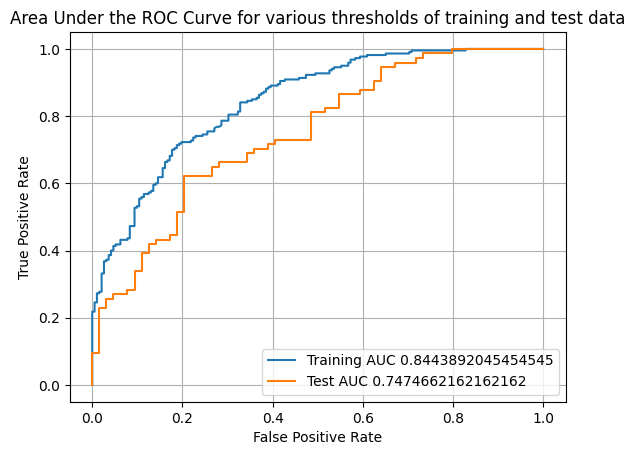

In [23]:
# Fitting the multinomial naive bayes algorithm
best_mod = MultinomialNB()
best_mod.set_params(**clf_nb_cbow_params)
print("Params of a Best model - {}".format(best_mod.get_params()))

best_mod.fit(preprocessed_train_bow, Y_train)

y_train_pred = best_mod.predict_proba(preprocessed_train_bow)[:,1]
y_test_pred = best_mod.predict_proba(preprocessed_test_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

#plt.figure(figsize = (10,5))
plt.plot(train_fpr, train_tpr, label = "Training AUC " + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = "Test AUC " + str(auc(test_fpr, test_tpr)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area Under the ROC Curve for various thresholds of training and test data")
plt.legend()
plt.grid()
plt.show()

##### TEST DATA PREDICTION AND CONFUSION MATRIX

the maximum value of tpr*(1-fpr) 0.5798295454545455 for threshold 0.564
Number of misclassified points  31.88405797101449


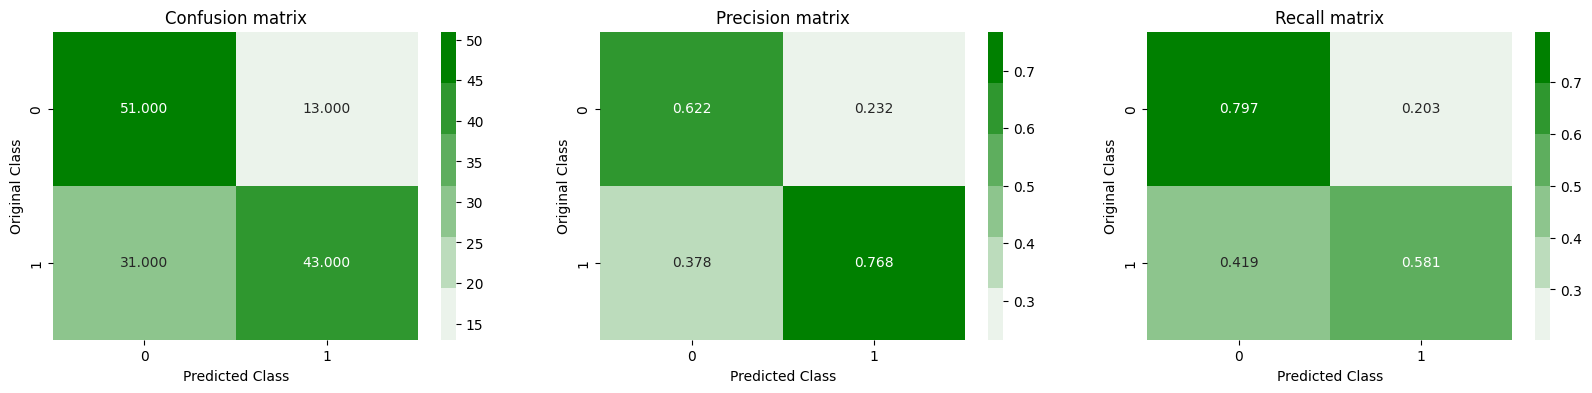

In [24]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
y_pred = predict_with_best_t(y_test_pred,best_t)
plot_confusion_matrix(Y_test, y_pred)

best_threshold_NB_bow = best_t

In [25]:
accuracy_a1 = accuracy_score(Y_test, y_pred)
precision_a1 = precision_score(Y_test, y_pred)
recall_a1 = recall_score(Y_test, y_pred)
f1_a1 = f1_score(Y_test, y_pred)
print('Accuracy: %.3f' % accuracy_a1, 'Precision: %.3f' % precision_a1, 'Recall: %.3f' % recall_a1, 'F1: %.3f' % f1_a1)

Accuracy: 0.681 Precision: 0.768 Recall: 0.581 F1: 0.662


#### TFIDF Vectorizer

Params of a Best model - {'alpha': 10, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}


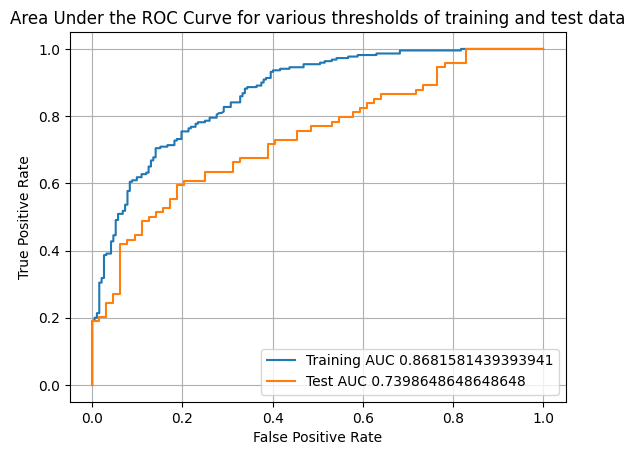

In [26]:
# Fitting the multinomial naive bayes algorithm
best_mod = MultinomialNB()
best_mod.set_params(**clf_nb_tfidf_params)
print("Params of a Best model - {}".format(best_mod.get_params()))

best_mod.fit(preprocessed_train_tfidf, Y_train)

y_train_pred = best_mod.predict_proba(preprocessed_train_tfidf)[:,1]
y_test_pred = best_mod.predict_proba(preprocessed_test_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

#plt.figure(figsize = (10,5))
plt.plot(train_fpr, train_tpr, label = "Training AUC " + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = "Test AUC " + str(auc(test_fpr, test_tpr)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area Under the ROC Curve for various thresholds of training and test data")
plt.legend()
plt.grid()
plt.show()

##### TEST DATA PREDICTION AND CONFUSION MATRIX

the maximum value of tpr*(1-fpr) 0.60546875 for threshold 0.549
Number of misclassified points  31.88405797101449


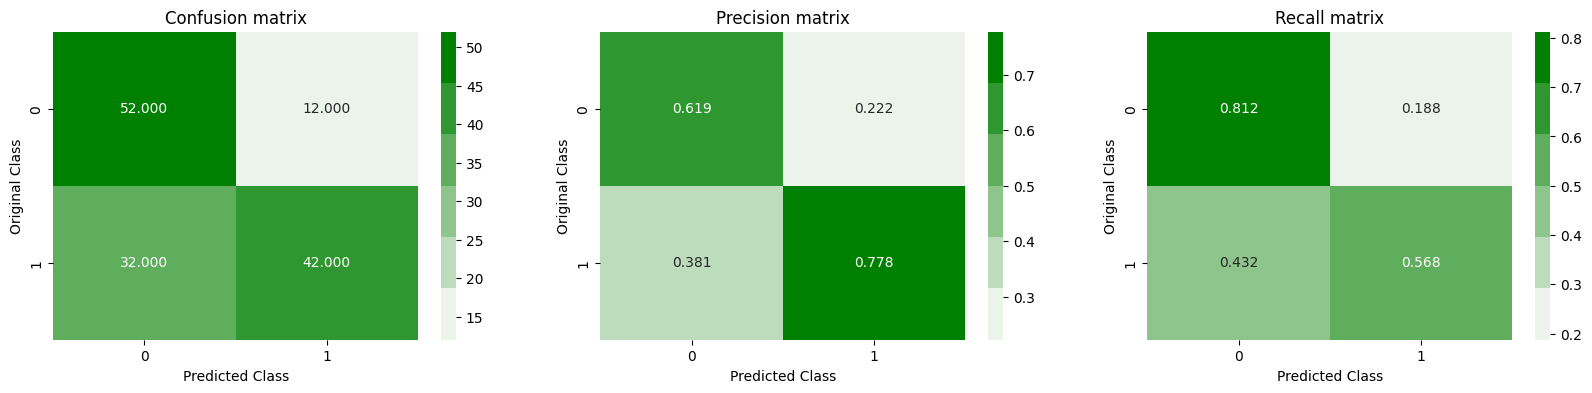

In [27]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
y_pred = predict_with_best_t(y_test_pred,best_t)
plot_confusion_matrix(Y_test, y_pred)

best_threshold_NB_tfidf = best_t

In [28]:
accuracy_b1 = accuracy_score(Y_test, y_pred)
precision_b1 = precision_score(Y_test, y_pred)
recall_b1 = recall_score(Y_test, y_pred)
f1_b1 = f1_score(Y_test, y_pred)
print('Accuracy: %.3f' % accuracy_b1, 'Precision: %.3f' % precision_b1, 'Recall: %.3f' % recall_b1, 'F1: %.3f' % f1_b1)

Accuracy: 0.681 Precision: 0.778 Recall: 0.568 F1: 0.656


## LOGISTIC REGRESSION
### Hyperparameter Tuning
    1. Alpha which is directly proportional to regularization.
    2. Penalty which could L1, L2 or Elastic Net

### CountVectorizer/BOW(Bag of Words)

The best set of parameters for the LR Classifier on the BOW featurized data are : {'penalty': 'l2', 'alpha': 0.5}


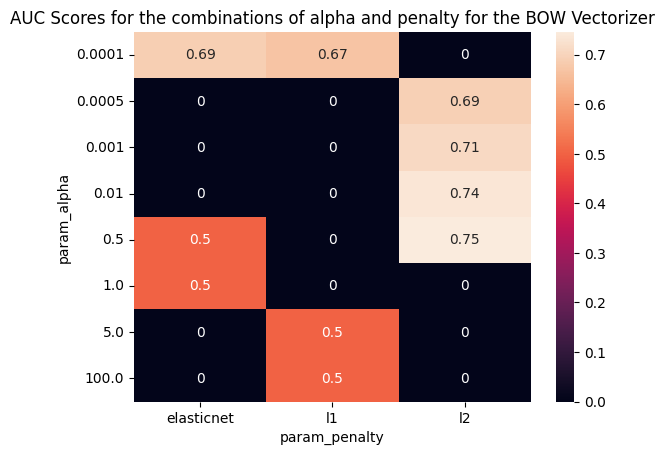

In [29]:
LR = SGDClassifier(loss = 'log_loss')

params = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100], 'penalty':['l1','l2','elasticnet']}

clf = RandomizedSearchCV(LR, param_distributions = params, scoring = 'roc_auc', cv=5, return_train_score = True, random_state = 42)
clf.fit(preprocessed_train_bow, Y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results.sort_values(by = ["param_alpha","param_penalty"], inplace=True)


train_auc = results["mean_train_score"]
train_std = results["std_train_score"]
cv_auc = results["mean_test_score"]
cv_std = results["std_test_score"]
#hparam_alpha = pd.Series([np.log(x) for x in results.param_alpha.values])
#hparam_penalty = results.param_penalty.values

score_df = pd.pivot_table(data = results, index = "param_alpha", columns = "param_penalty", values = "mean_test_score")

# Removing the nan values from the dataset to avoid any errors during plotting of the auc scores for various combinations
score_df.fillna(0, inplace=True)

sns.heatmap(score_df, annot = True)
plt.title("AUC Scores for the combinations of alpha and penalty for the BOW Vectorizer")

print("The best set of parameters for the LR Classifier on the BOW featurized data are : {}".format(clf.best_params_))
clf_lr_cbow_params = clf.best_params_

### TFIDF Vectorizer

The best set of parameters for the LR Classifier on the TFIDF featurized data are : {'penalty': 'l2', 'alpha': 0.5}


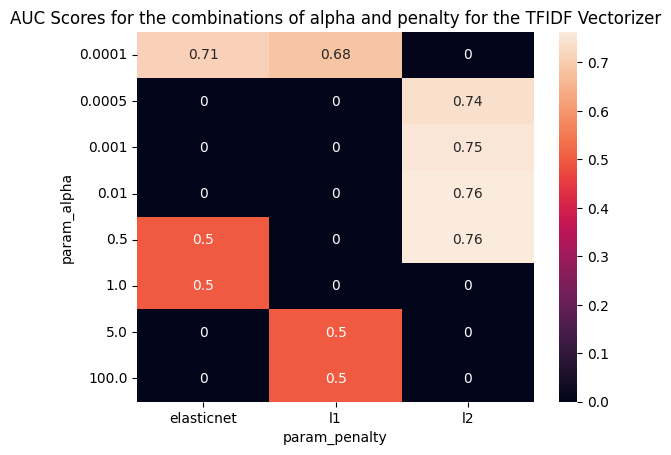

In [30]:
LR = SGDClassifier(loss = 'log_loss')

params = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100], 'penalty':['l1','l2','elasticnet']}

clf = RandomizedSearchCV(LR, param_distributions = params, scoring = 'roc_auc', cv=5, return_train_score = True, random_state = 42)
clf.fit(preprocessed_train_tfidf, Y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results.sort_values(by = ["param_alpha","param_penalty"], inplace=True)


train_auc = results["mean_train_score"]
train_std = results["std_train_score"]
cv_auc = results["mean_test_score"]
cv_std = results["std_test_score"]
#hparam_alpha = pd.Series([np.log(x) for x in results.param_alpha.values])
#hparam_penalty = results.param_penalty.values

score_df = pd.pivot_table(data = results, index = "param_alpha", columns = "param_penalty", values = "mean_test_score")

# Removing the nan values from the dataset to avoid any errors during plotting of the auc scores for various combinations
score_df.fillna(0, inplace=True)

sns.heatmap(score_df, annot = True)
plt.title("AUC Scores for the combinations of alpha and penalty for the TFIDF Vectorizer")

print("The best set of parameters for the LR Classifier on the TFIDF featurized data are : {}".format(clf.best_params_))
clf_lr_tfidf_params = clf.best_params_

### Best Model Fitting

#### CountVectorizer/BOW(Bag of Words)

Params of a Best model - {'alpha': 0.5, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log_loss', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


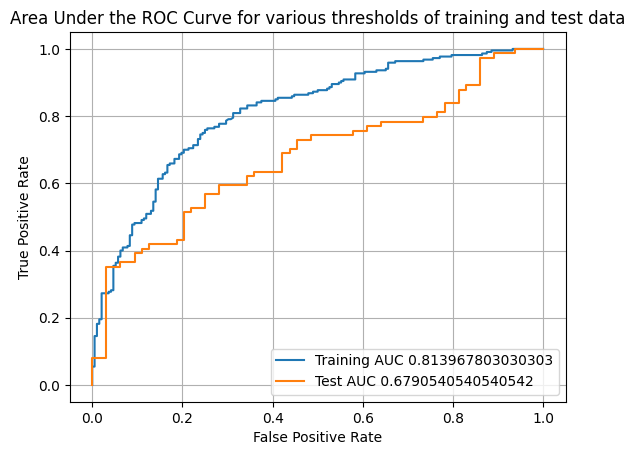

In [31]:
# Fitting the multinomial naive bayes algorithm
best_mod = SGDClassifier(loss = 'log_loss')
best_mod.set_params(**clf_lr_cbow_params)
print("Params of a Best model - {}".format(best_mod.get_params()))

best_mod.fit(preprocessed_train_bow, Y_train)

y_train_pred = best_mod.predict_proba(preprocessed_train_bow)[:,1]
y_test_pred = best_mod.predict_proba(preprocessed_test_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

#plt.figure(figsize = (10,5))
plt.plot(train_fpr, train_tpr, label = "Training AUC " + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = "Test AUC " + str(auc(test_fpr, test_tpr)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area Under the ROC Curve for various thresholds of training and test data")
plt.legend()
plt.grid()
plt.show()

##### TEST DATA PREDICTION AND CONFUSION MATRIX

the maximum value of tpr*(1-fpr) 0.5693181818181818 for threshold 0.503
Number of misclassified points  34.78260869565217


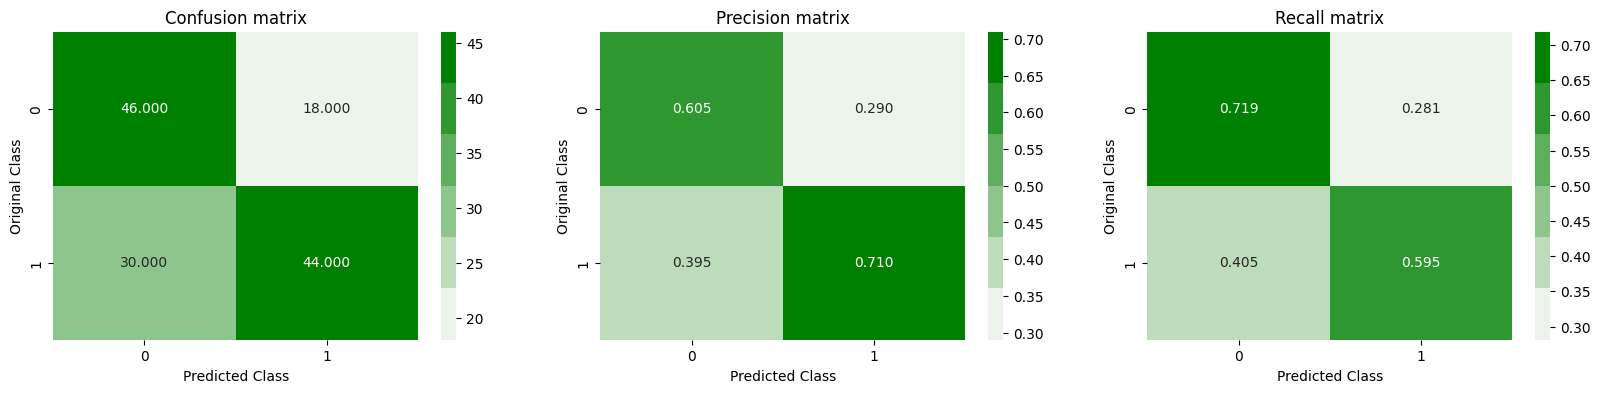

In [32]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
y_pred = predict_with_best_t(y_test_pred,best_t)
plot_confusion_matrix(Y_test, y_pred)

best_threshold_LR_bow = best_t

In [33]:
accuracy_a2 = accuracy_score(Y_test, y_pred)
precision_a2 = precision_score(Y_test, y_pred)
recall_a2 = recall_score(Y_test, y_pred)
f1_a2 = f1_score(Y_test, y_pred)
print('Accuracy: %.3f' % accuracy_a2, 'Precision: %.3f' % precision_a2, 'Recall: %.3f' % recall_a2, 'F1: %.3f' % f1_a2)

Accuracy: 0.652 Precision: 0.710 Recall: 0.595 F1: 0.647


#### TFIDF Vectorizer

Params of a Best model - {'alpha': 0.5, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log_loss', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


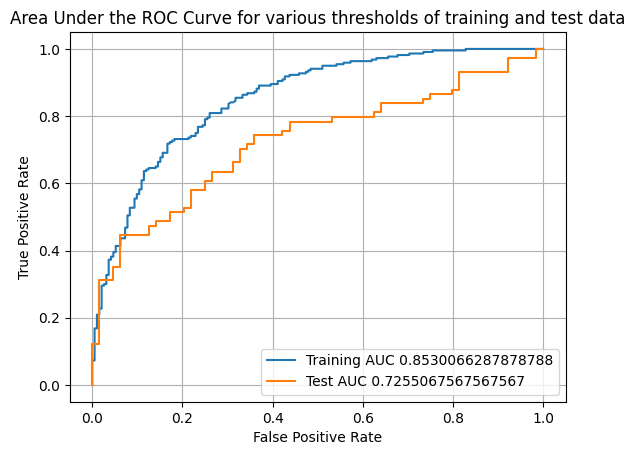

In [34]:
# Fitting the multinomial naive bayes algorithm
best_mod = SGDClassifier(loss = 'log_loss')
best_mod.set_params(**clf_lr_tfidf_params)
print("Params of a Best model - {}".format(best_mod.get_params()))

best_mod.fit(preprocessed_train_tfidf, Y_train)

y_train_pred = best_mod.predict_proba(preprocessed_train_tfidf)[:,1]
y_test_pred = best_mod.predict_proba(preprocessed_test_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

#plt.figure(figsize = (10,5))
plt.plot(train_fpr, train_tpr, label = "Training AUC " + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = "Test AUC " + str(auc(test_fpr, test_tpr)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area Under the ROC Curve for various thresholds of training and test data")
plt.legend()
plt.grid()
plt.show()

##### TEST DATA PREDICTION AND CONFUSION MATRIX

the maximum value of tpr*(1-fpr) 0.5985085227272727 for threshold 0.503
Number of misclassified points  33.33333333333333


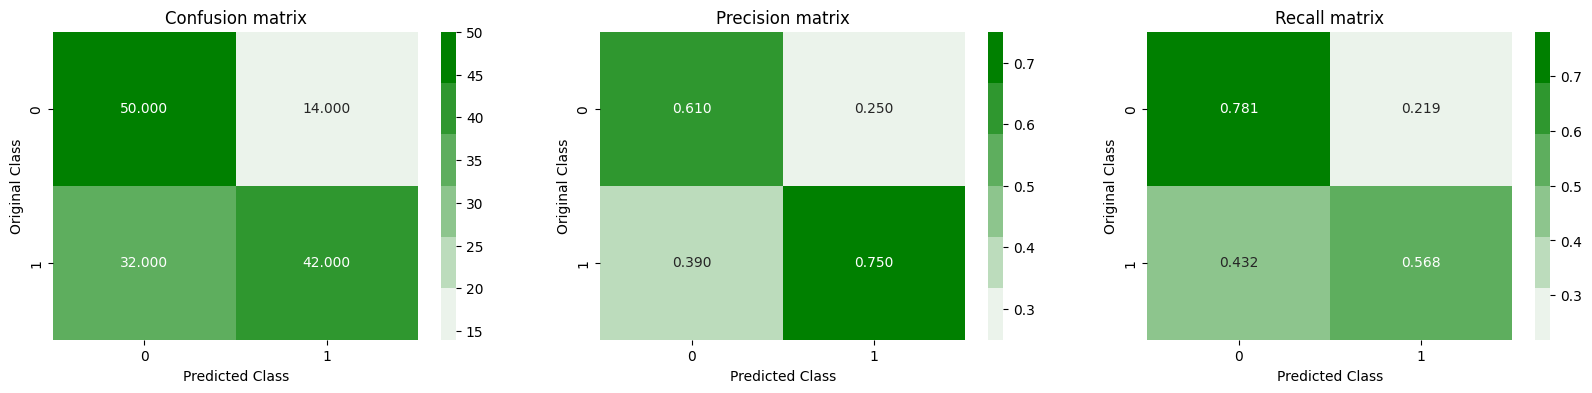

In [35]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
y_pred = predict_with_best_t(y_test_pred,best_t)
plot_confusion_matrix(Y_test, y_pred)

best_threshold_LR_tfidf = best_t

In [36]:
accuracy_b2 = accuracy_score(Y_test, y_pred)
precision_b2 = precision_score(Y_test, y_pred)
recall_b2 = recall_score(Y_test, y_pred)
f1_b2 = f1_score(Y_test, y_pred)
print('Accuracy: %.3f' % accuracy_b2, 'Precision: %.3f' % precision_b2, 'Recall: %.3f' % recall_b2, 'F1: %.3f' % f1_b2)

Accuracy: 0.667 Precision: 0.750 Recall: 0.568 F1: 0.646


## LINEAR SVM
### Hyperparameter Tuning
    1. C which is the inverse of the regularization strength and it penalizes the outliers.

### CountVectorizer/BOW(Bag of Words)

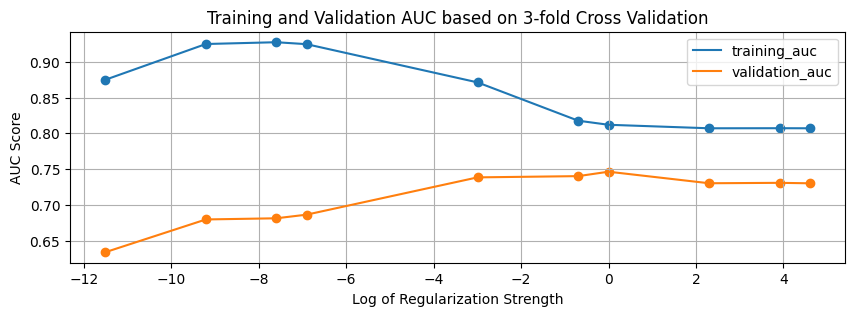

The best regularization strength parameter alpha on the random search over the given hyperparameter space for CountVectorizer using Linear SVM is :  {'alpha': 1}


In [37]:
SV = SGDClassifier(loss = 'hinge')

params = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

clf = RandomizedSearchCV(SV, param_distributions = params, scoring = 'roc_auc', cv=5, return_train_score = True, random_state = 42)
clf.fit(preprocessed_train_bow, Y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results.sort_values(by = "param_alpha", inplace=True)

train_auc = results["mean_train_score"]
train_std = results["std_train_score"]
cv_auc = results["mean_test_score"]
cv_std = results["std_test_score"]
hparam = pd.Series([np.log(x) for x in results.param_alpha.values])

plt.figure(figsize = (10,3))
plt.plot(hparam, train_auc, label = "training_auc")
plt.plot(hparam, cv_auc, label = "validation_auc")
plt.scatter(hparam, train_auc)
plt.scatter(hparam, cv_auc)
plt.xlabel("Log of Regularization Strength")
plt.ylabel("AUC Score")
plt.title("Training and Validation AUC based on 3-fold Cross Validation")
plt.legend()
plt.grid()
plt.show()

print("The best regularization strength parameter alpha on the random search " + 
      "over the given hyperparameter space for CountVectorizer using Linear SVM is : ", clf.best_params_)
clf_svm_cbow_params = clf.best_params_

### TFIDF Vectorizer

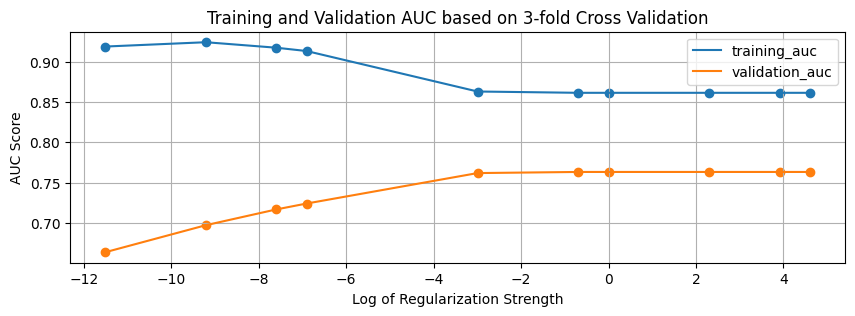

The best regularization strength parameter alpha on the random search over the given hyperparameter space for TFIDF Vectorizer using Linear SVM is :  {'alpha': 1}


In [38]:
SV = SGDClassifier(loss = 'hinge')

params = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

clf = RandomizedSearchCV(SV, param_distributions = params, scoring = 'roc_auc', cv=5, return_train_score = True, random_state = 42)
clf.fit(preprocessed_train_tfidf, Y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results.sort_values(by = "param_alpha", inplace=True)

train_auc = results["mean_train_score"]
train_std = results["std_train_score"]
cv_auc = results["mean_test_score"]
cv_std = results["std_test_score"]
hparam = pd.Series([np.log(x) for x in results.param_alpha.values])

plt.figure(figsize = (10,3))
plt.plot(hparam, train_auc, label = "training_auc")
plt.plot(hparam, cv_auc, label = "validation_auc")
plt.scatter(hparam, train_auc)
plt.scatter(hparam, cv_auc)
plt.xlabel("Log of Regularization Strength")
plt.ylabel("AUC Score")
plt.title("Training and Validation AUC based on 3-fold Cross Validation")
plt.legend()
plt.grid()
plt.show()

print("The best regularization strength parameter alpha on the random search " + 
      "over the given hyperparameter space for TFIDF Vectorizer using Linear SVM is : ", clf.best_params_)
clf_svm_tfidf_params = clf.best_params_

### Best Model Fitting

#### CountVectorizer/BOW(Bag of Words)

Params of a Best model - {'alpha': 1, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


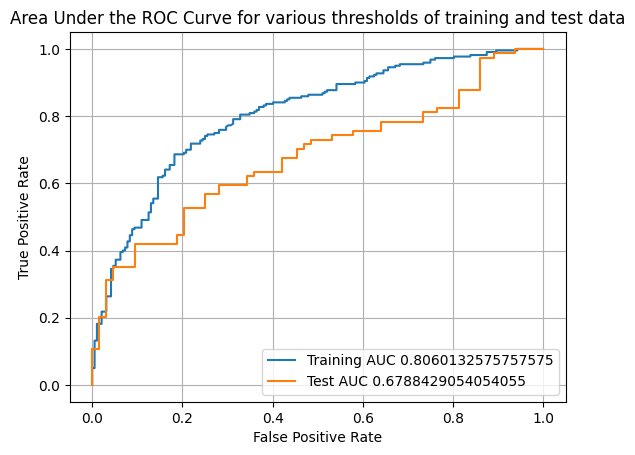

In [39]:
# Fitting the multinomial naive bayes algorithm
best_mod = SGDClassifier(loss = 'hinge')
best_mod.set_params(**clf_svm_cbow_params)
print("Params of a Best model - {}".format(best_mod.get_params()))
cal_clf = CalibratedClassifierCV(best_mod, method = "sigmoid", cv = 5)

cal_clf.fit(preprocessed_train_bow, Y_train)

y_train_pred = cal_clf.predict_proba(preprocessed_train_bow)[:,1]
y_test_pred = cal_clf.predict_proba(preprocessed_test_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

#plt.figure(figsize = (10,5))
plt.plot(train_fpr, train_tpr, label = "Training AUC " + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = "Test AUC " + str(auc(test_fpr, test_tpr)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area Under the ROC Curve for various thresholds of training and test data")
plt.legend()
plt.grid()
plt.show()

##### TEST DATA PREDICTION AND CONFUSION MATRIX

the maximum value of tpr*(1-fpr) 0.5612452651515152 for threshold 0.525
Number of misclassified points  36.95652173913043


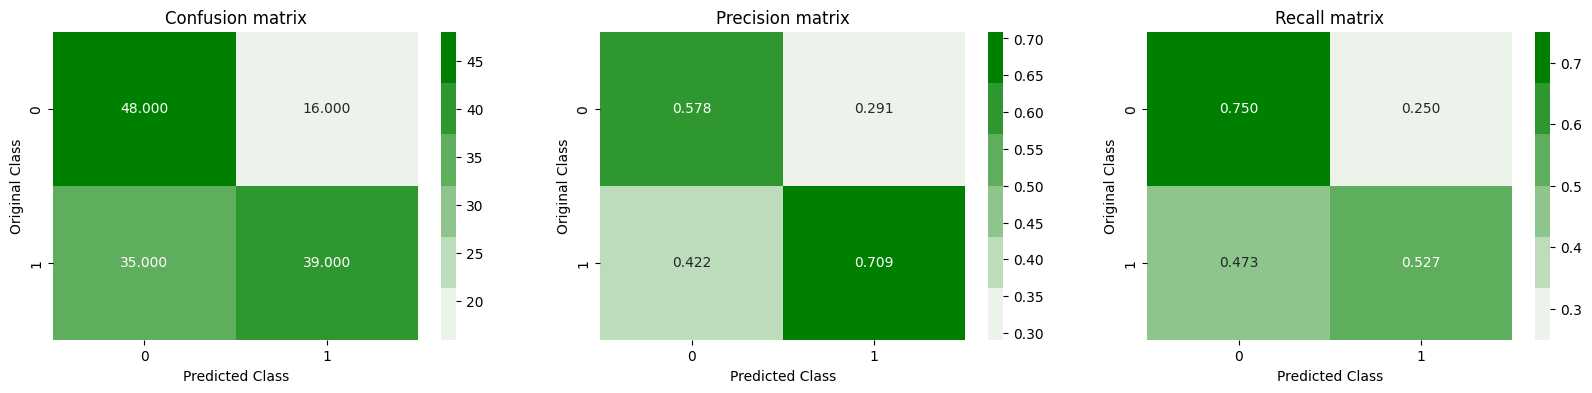

In [40]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
y_pred = predict_with_best_t(y_test_pred,best_t)
plot_confusion_matrix(Y_test, y_pred)

best_threshold_SVM_bow = best_t

In [41]:
accuracy_c1 = accuracy_score(Y_test, y_pred)
precision_c1 = precision_score(Y_test, y_pred)
recall_c1 = recall_score(Y_test, y_pred)
f1_c1 = f1_score(Y_test, y_pred)
print('Accuracy: %.3f' % accuracy_c1, 'Precision: %.3f' % precision_c1, 'Recall: %.3f' % recall_c1, 'F1: %.3f' % f1_c1)

Accuracy: 0.630 Precision: 0.709 Recall: 0.527 F1: 0.605


#### TFIDF Vectorizer

Params of a Best model - {'alpha': 1, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


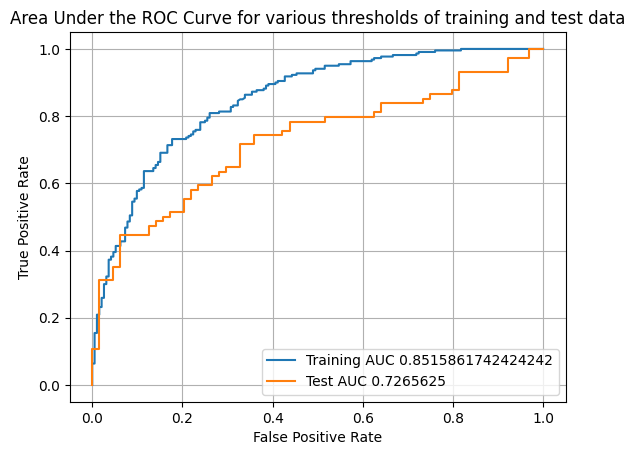

In [42]:
# Fitting the multinomial naive bayes algorithm
best_mod = SGDClassifier(loss = 'hinge')
best_mod.set_params(**clf_svm_tfidf_params)
print("Params of a Best model - {}".format(best_mod.get_params()))
cal_clf = CalibratedClassifierCV(best_mod, method = "sigmoid", cv = 5)

cal_clf.fit(preprocessed_train_tfidf, Y_train)

y_train_pred = cal_clf.predict_proba(preprocessed_train_tfidf)[:,1]
y_test_pred = cal_clf.predict_proba(preprocessed_test_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

#plt.figure(figsize = (10,5))
plt.plot(train_fpr, train_tpr, label = "Training AUC " + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = "Test AUC " + str(auc(test_fpr, test_tpr)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area Under the ROC Curve for various thresholds of training and test data")
plt.legend()
plt.grid()
plt.show()

##### TEST DATA PREDICTION AND CONFUSION MATRIX

the maximum value of tpr*(1-fpr) 0.6022253787878787 for threshold 0.532
Number of misclassified points  33.33333333333333


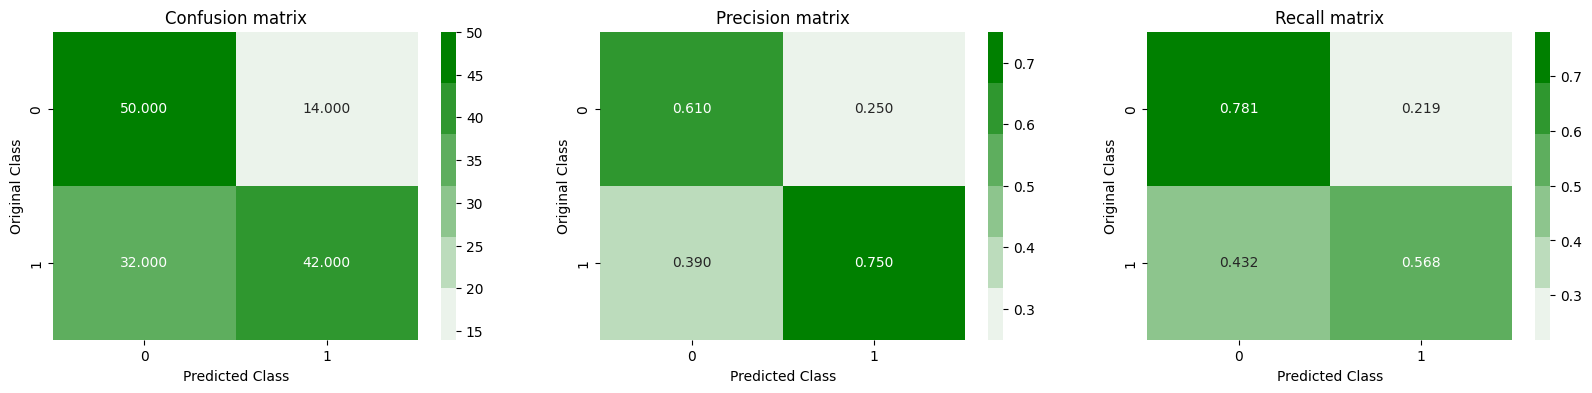

In [43]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
y_pred = predict_with_best_t(y_test_pred,best_t)
plot_confusion_matrix(Y_test, y_pred)

best_threshold_SVM_tfidf = best_t

In [44]:
accuracy_c2 = accuracy_score(Y_test, y_pred)
precision_c2 = precision_score(Y_test, y_pred)
recall_c2 = recall_score(Y_test, y_pred)
f1_c2 = f1_score(Y_test, y_pred)
print('Accuracy: %.3f' % accuracy_c2, 'Precision: %.3f' % precision_c2, 'Recall: %.3f' % recall_c2, 'F1: %.3f' % f1_c2)

Accuracy: 0.667 Precision: 0.750 Recall: 0.568 F1: 0.646


## GRADIENT BOOSTED DECISION TREES
### Hyperparameter Tuning
    1. No. of Base Learners
    2. Learning Rate

### CountVectorizer/BOW(Bag of Words)

The best set of parameters for the GBDT Classifier on the BOW featurized data are : {'n_estimators': 50, 'learning_rate': 0.2}


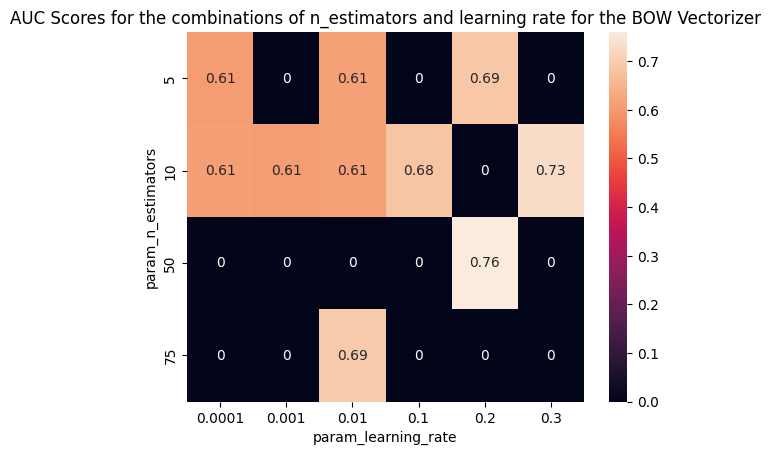

In [45]:
gbdt_clf = gbc()

params = {'n_estimators':[5,10,50,75], 'learning_rate':[0.0001,0.001,0.01,0.1,0.2,0.3]}

clf = RandomizedSearchCV(gbdt_clf, param_distributions = params, scoring = 'roc_auc', cv=5, return_train_score = True, random_state = 42)
clf.fit(preprocessed_train_bow, Y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results.sort_values(by = ["param_n_estimators","param_learning_rate"], inplace=True)


train_auc = results["mean_train_score"]
train_std = results["std_train_score"]
cv_auc = results["mean_test_score"]
cv_std = results["std_test_score"]

score_df = pd.pivot_table(data = results, index = "param_n_estimators", columns = "param_learning_rate", values = "mean_test_score")

# Removing the nan values from the dataset to avoid any errors during plotting of the auc scores for various combinations
score_df.fillna(0, inplace=True)

sns.heatmap(score_df, annot = True)
plt.title("AUC Scores for the combinations of n_estimators and learning rate for the BOW Vectorizer")

print("The best set of parameters for the GBDT Classifier on the BOW featurized data are : {}".format(clf.best_params_))
clf_gbdt_cbow_params = clf.best_params_

### TFIDF Vectorizer

The best set of parameters for the GBDT Classifier on the TFIDF featurized data are : {'n_estimators': 50, 'learning_rate': 0.2}


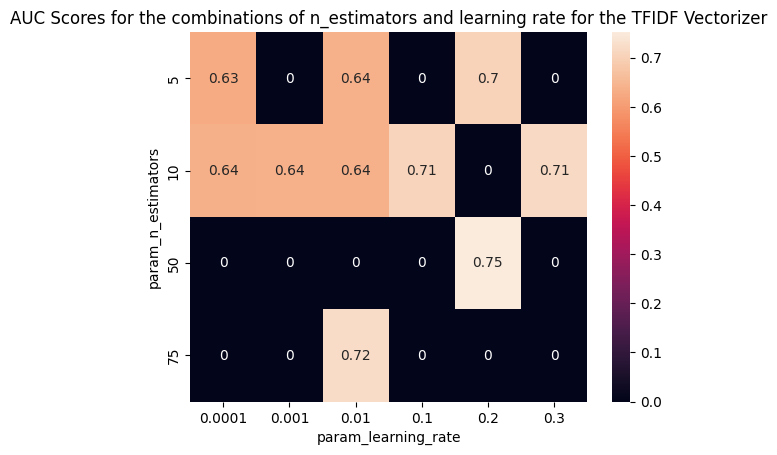

In [46]:
gbdt_clf = gbc()

params = {'n_estimators':[5,10,50,75], 'learning_rate':[0.0001,0.001,0.01,0.1,0.2,0.3]}

clf = RandomizedSearchCV(gbdt_clf, param_distributions = params, scoring = 'roc_auc', cv=5, return_train_score = True, random_state = 42)
clf.fit(preprocessed_train_tfidf, Y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results.sort_values(by = ["param_n_estimators","param_learning_rate"], inplace=True)


train_auc = results["mean_train_score"]
train_std = results["std_train_score"]
cv_auc = results["mean_test_score"]
cv_std = results["std_test_score"]

score_df = pd.pivot_table(data = results, index = "param_n_estimators", columns = "param_learning_rate", values = "mean_test_score")

# Removing the nan values from the dataset to avoid any errors during plotting of the auc scores for various combinations
score_df.fillna(0, inplace=True)

sns.heatmap(score_df, annot = True)
plt.title("AUC Scores for the combinations of n_estimators and learning rate for the TFIDF Vectorizer")

print("The best set of parameters for the GBDT Classifier on the TFIDF featurized data are : {}".format(clf.best_params_))
clf_gbdt_tfidf_params = clf.best_params_

### Best Model Fitting

#### CountVectorizer/BOW(Bag of Words)

Params of a Best model - {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


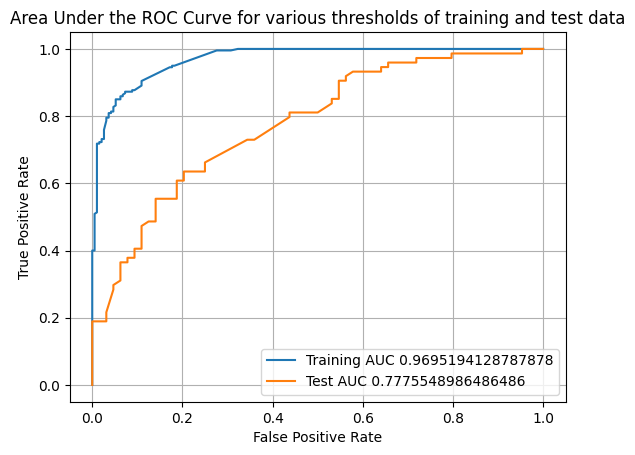

In [47]:
# Fitting the multinomial naive bayes algorithm
best_mod = gbc()
best_mod.set_params(**clf_gbdt_cbow_params)
print("Params of a Best model - {}".format(best_mod.get_params()))

best_mod.fit(preprocessed_train_bow, Y_train)

y_train_pred = best_mod.predict_proba(preprocessed_train_bow)[:,1]
y_test_pred = best_mod.predict_proba(preprocessed_test_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

#plt.figure(figsize = (10,5))
plt.plot(train_fpr, train_tpr, label = "Training AUC " + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = "Test AUC " + str(auc(test_fpr, test_tpr)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area Under the ROC Curve for various thresholds of training and test data")
plt.legend()
plt.grid()
plt.show()

##### TEST DATA PREDICTION AND CONFUSION MATRIX

the maximum value of tpr*(1-fpr) 0.8090909090909091 for threshold 0.506
Number of misclassified points  29.71014492753623


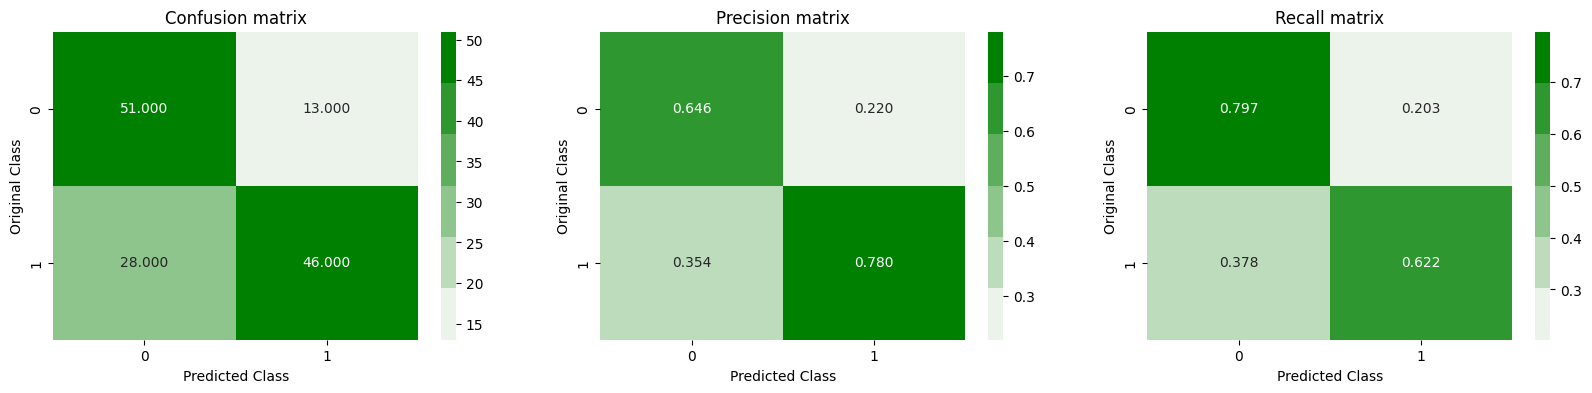

In [48]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
y_pred = predict_with_best_t(y_test_pred,best_t)
plot_confusion_matrix(Y_test, y_pred)

best_threshold_gbdt_bow = best_t

In [49]:
accuracy_d1 = accuracy_score(Y_test, y_pred)
precision_d1 = precision_score(Y_test, y_pred)
recall_d1 = recall_score(Y_test, y_pred)
f1_d1 = f1_score(Y_test, y_pred)
print('Accuracy: %.3f' % accuracy_d1, 'Precision: %.3f' % precision_d1, 'Recall: %.3f' % recall_d1, 'F1: %.3f' % f1_d1)

Accuracy: 0.703 Precision: 0.780 Recall: 0.622 F1: 0.692


#### TFIDF Vectorizer

Params of a Best model - {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


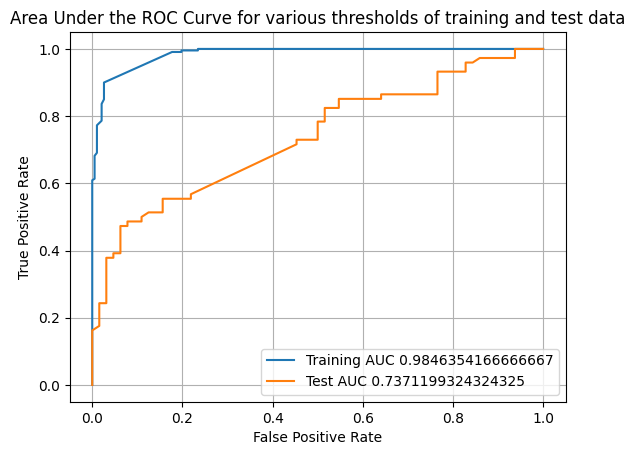

In [50]:
# Fitting the multinomial naive bayes algorithm
best_mod = gbc()
best_mod.set_params(**clf_gbdt_tfidf_params)
print("Params of a Best model - {}".format(best_mod.get_params()))

best_mod.fit(preprocessed_train_tfidf, Y_train)

y_train_pred = best_mod.predict_proba(preprocessed_train_tfidf)[:,1]
y_test_pred = best_mod.predict_proba(preprocessed_test_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

#plt.figure(figsize = (10,5))
plt.plot(train_fpr, train_tpr, label = "Training AUC " + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = "Test AUC " + str(auc(test_fpr, test_tpr)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area Under the ROC Curve for various thresholds of training and test data")
plt.legend()
plt.grid()
plt.show()

##### TEST DATA PREDICTION AND CONFUSION MATRIX

the maximum value of tpr*(1-fpr) 0.8765625 for threshold 0.523
Number of misclassified points  32.608695652173914


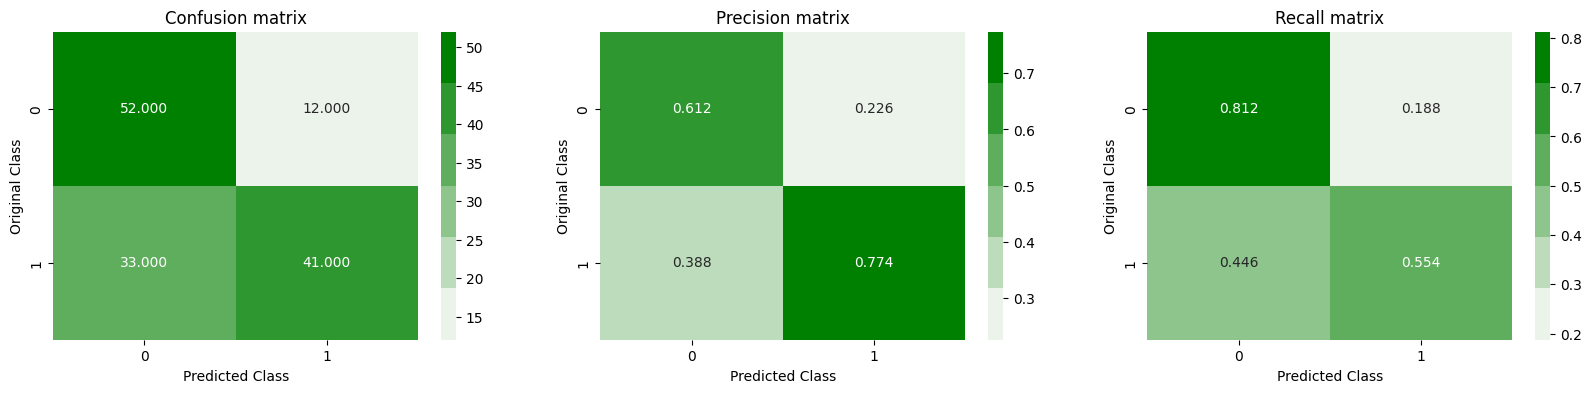

In [51]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
y_pred = predict_with_best_t(y_test_pred,best_t)
plot_confusion_matrix(Y_test, y_pred)

best_threshold_gbdt_tfidf = best_t

In [52]:
accuracy_d2 = accuracy_score(Y_test, y_pred)
precision_d2 = precision_score(Y_test, y_pred)
recall_d2 = recall_score(Y_test, y_pred)
f1_d2 = f1_score(Y_test, y_pred)
print('Accuracy: %.3f' % accuracy_d2, 'Precision: %.3f' % precision_d2, 'Recall: %.3f' % recall_d2, 'F1: %.3f' % f1_d2)

Accuracy: 0.674 Precision: 0.774 Recall: 0.554 F1: 0.646


## RANDOM FORESTS
### Hyperparameter Tuning
    1. n_estimators which is the number of base learners or the individual decision trees.
    2. max_depth which is the maximum depth to which the decision trees should grow.

### CountVectorizer/BOW(Bag of Words)

The best set of parameters for the Random Forest Classifier on the BOW featurized data are : {'n_estimators': 100, 'max_depth': 20}


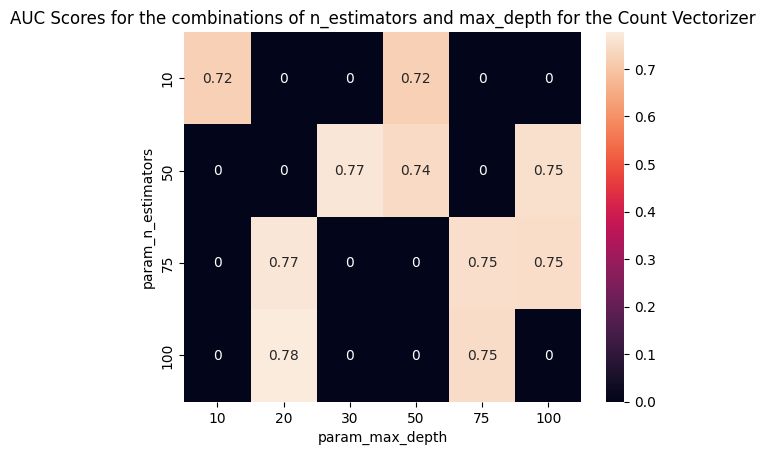

In [53]:
rf_clf = RandomForestClassifier()

params = {'n_estimators':[10,25,50,75,100], 'max_depth':[10,20,30,50,75,100]}

clf = RandomizedSearchCV(rf_clf, param_distributions = params, scoring = 'roc_auc', cv=5, return_train_score = True, random_state = 42)
clf.fit(preprocessed_train_bow, Y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results.sort_values(by = ["param_n_estimators","param_max_depth"], inplace=True)


train_auc = results["mean_train_score"]
train_std = results["std_train_score"]
cv_auc = results["mean_test_score"]
cv_std = results["std_test_score"]

score_df = pd.pivot_table(data = results, index = "param_n_estimators", columns = "param_max_depth", values = "mean_test_score")

# Removing the nan values from the dataset to avoid any errors during plotting of the auc scores for various combinations
score_df.fillna(0, inplace=True)

sns.heatmap(score_df, annot = True)
plt.title("AUC Scores for the combinations of n_estimators and max_depth for the Count Vectorizer")

print("The best set of parameters for the Random Forest Classifier on the BOW featurized data are : {}".format(clf.best_params_))
clf_rf_cbow_params = clf.best_params_

### TFIDF Vectorizer

The best set of parameters for the Random Forest Classifier on the TFIDF featurized data are : {'n_estimators': 100, 'max_depth': 20}


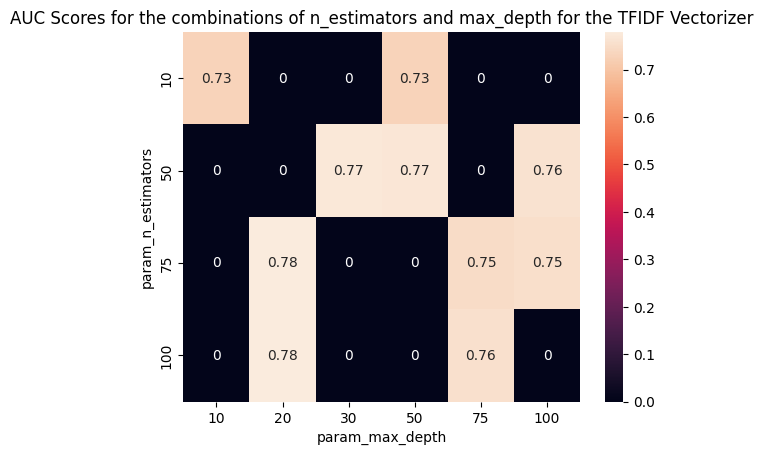

In [54]:
rf_clf = RandomForestClassifier()

params = {'n_estimators':[10,25,50,75,100], 'max_depth':[10,20,30,50,75,100]}

clf = RandomizedSearchCV(rf_clf, param_distributions = params, scoring = 'roc_auc', cv=5, return_train_score = True, random_state = 42)
clf.fit(preprocessed_train_tfidf, Y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results.sort_values(by = ["param_n_estimators","param_max_depth"], inplace=True)


train_auc = results["mean_train_score"]
train_std = results["std_train_score"]
cv_auc = results["mean_test_score"]
cv_std = results["std_test_score"]

score_df = pd.pivot_table(data = results, index = "param_n_estimators", columns = "param_max_depth", values = "mean_test_score")

# Removing the nan values from the dataset to avoid any errors during plotting of the auc scores for various combinations
score_df.fillna(0, inplace=True)

sns.heatmap(score_df, annot = True)
plt.title("AUC Scores for the combinations of n_estimators and max_depth for the TFIDF Vectorizer")

print("The best set of parameters for the Random Forest Classifier on the TFIDF featurized data are : {}".format(clf.best_params_))
clf_rf_tfidf_params = clf.best_params_

### Best Model Fitting

#### CountVectorizer/BOW(Bag of Words)

Params of a Best model - {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


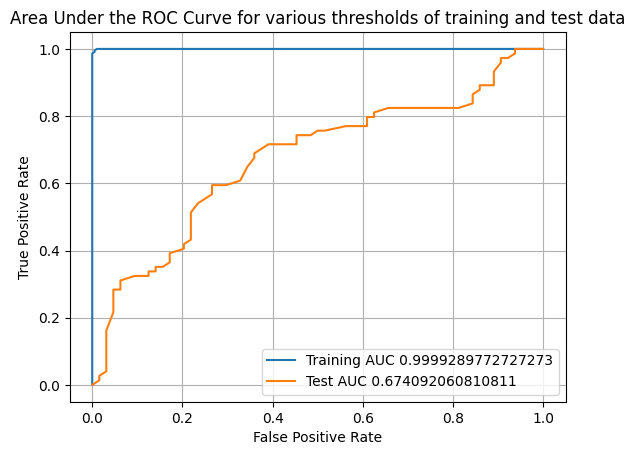

In [55]:
# Fitting the multinomial naive bayes algorithm
best_mod_rf_bow = RandomForestClassifier(oob_score = True, random_state = 42)
best_mod.set_params(**clf_rf_cbow_params)
print("Params of a Best model - {}".format(best_mod.get_params()))

best_mod_rf_bow.fit(preprocessed_train_bow, Y_train)

y_train_pred = best_mod_rf_bow.predict_proba(preprocessed_train_bow)[:,1]
y_test_pred = best_mod_rf_bow.predict_proba(preprocessed_test_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

#plt.figure(figsize = (10,5))
plt.plot(train_fpr, train_tpr, label = "Training AUC " + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = "Test AUC " + str(auc(test_fpr, test_tpr)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area Under the ROC Curve for various thresholds of training and test data")
plt.legend()
plt.grid()
plt.show()

##### TEST DATA PREDICTION AND CONFUSION MATRIX

the maximum value of tpr*(1-fpr) 0.9902698863636363 for threshold 0.54
Number of misclassified points  34.78260869565217


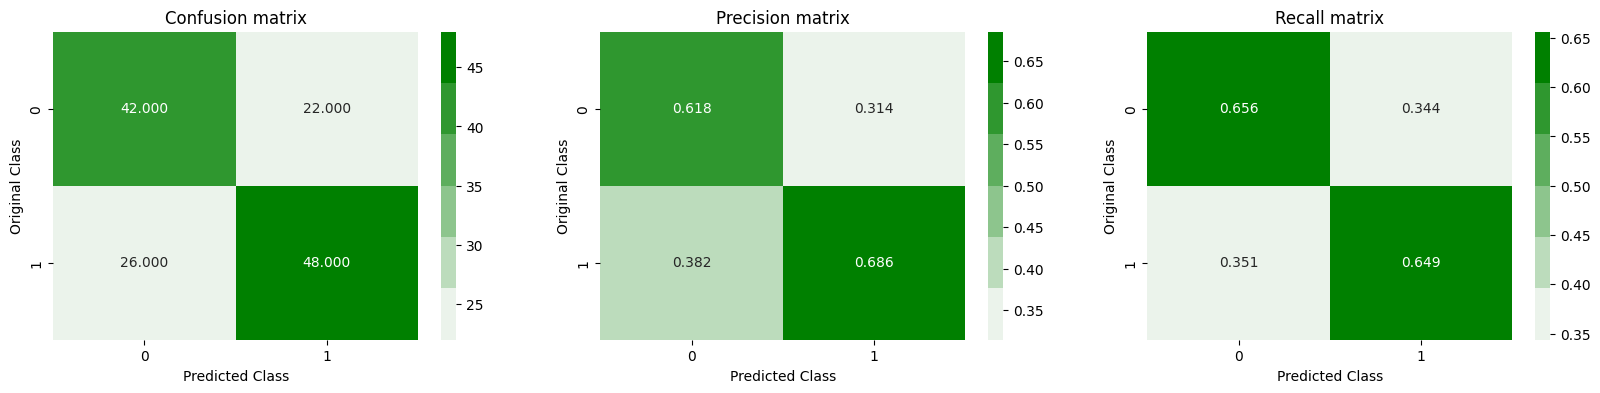

In [56]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
y_pred = predict_with_best_t(y_test_pred,best_t)
plot_confusion_matrix(Y_test, y_pred)

best_threshold_rfclf_bow = best_t

In [57]:
accuracy_e1 = accuracy_score(Y_test, y_pred)
precision_e1 = precision_score(Y_test, y_pred)
recall_e1 = recall_score(Y_test, y_pred)
f1_e1 = f1_score(Y_test, y_pred)
print('Accuracy: %.3f' % accuracy_e1, 'Precision: %.3f' % precision_e1, 'Recall: %.3f' % recall_e1, 'F1: %.3f' % f1_e1)

Accuracy: 0.652 Precision: 0.686 Recall: 0.649 F1: 0.667


#### TFIDF Vectorizer

Params of a Best model - {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


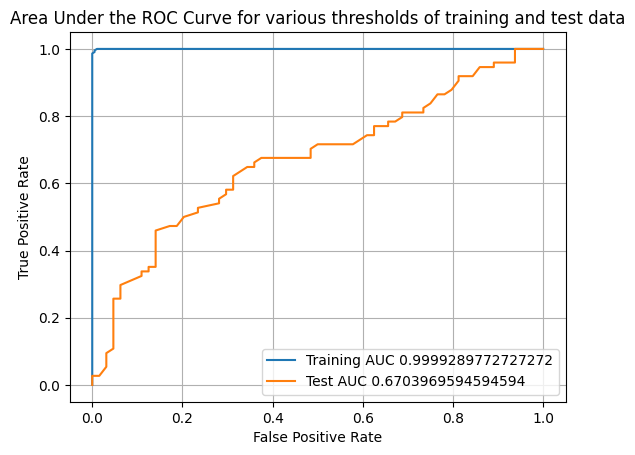

In [58]:
# Fitting the multinomial naive bayes algorithm
best_mod_rf_tfidf = RandomForestClassifier(oob_score = True, random_state = 42)
best_mod.set_params(**clf_rf_tfidf_params)
print("Params of a Best model - {}".format(best_mod.get_params()))

best_mod_rf_tfidf.fit(preprocessed_train_tfidf, Y_train)

y_train_pred = best_mod_rf_tfidf.predict_proba(preprocessed_train_tfidf)[:,1]
y_test_pred = best_mod_rf_tfidf.predict_proba(preprocessed_test_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

#plt.figure(figsize = (10,5))
plt.plot(train_fpr, train_tpr, label = "Training AUC " + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = "Test AUC " + str(auc(test_fpr, test_tpr)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area Under the ROC Curve for various thresholds of training and test data")
plt.legend()
plt.grid()
plt.show()

##### TEST DATA PREDICTION AND CONFUSION MATRIX

the maximum value of tpr*(1-fpr) 0.9902698863636363 for threshold 0.54
Number of misclassified points  34.78260869565217


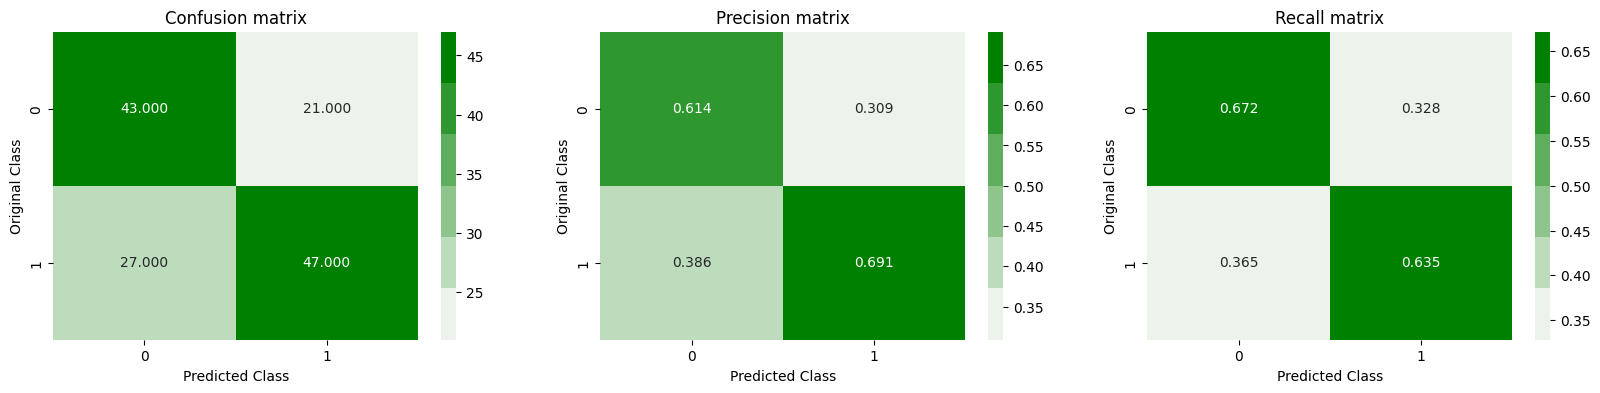

In [59]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
y_pred = predict_with_best_t(y_test_pred,best_t)
plot_confusion_matrix(Y_test, y_pred)

best_threshold_rfclf_tfidf = best_t

In [60]:
accuracy_e2 = accuracy_score(Y_test, y_pred)
precision_e2 = precision_score(Y_test, y_pred)
recall_e2 = recall_score(Y_test, y_pred)
f1_e2 = f1_score(Y_test, y_pred)
print('Accuracy: %.3f' % accuracy_e2, 'Precision: %.3f' % precision_e2, 'Recall: %.3f' % recall_e2, 'F1: %.3f' % f1_e2)

Accuracy: 0.652 Precision: 0.691 Recall: 0.635 F1: 0.662


# Model Summary

I have used five models to fit on the unigrams BOW and tfidf vectorized data and here are the results summarized in one table as under:-

In [61]:
summary = {
    'Model': ['Naive Bayes','Logistic Regression','Linear SVM','GBDT','Random Forest']*2,
    'Vectorizer': ['BOW_Unigrams']*5+['TFIDF_Unigrams']*5, 
    'Accuracy': [accuracy_a1, accuracy_b1, accuracy_c1, accuracy_d1, accuracy_e1, 
                 accuracy_a2, accuracy_b2, accuracy_c2, accuracy_d2, accuracy_e2],
    'Precision': [precision_a1, precision_b1, precision_c1, precision_d1, precision_e1, 
                  precision_a2, precision_b2, precision_c2, precision_d2, precision_e2],
    'Recall': [recall_a1, recall_b1, recall_c1, recall_d1, recall_e1,
               recall_a2, recall_b2, recall_c2, recall_d2, recall_e2],
    'F1': [f1_a1, f1_b1, f1_c1, f1_d1, f1_e1, 
           f1_a2, f1_b2, f1_c2, f1_d2, f1_e2]
}

fin_summary = pd.DataFrame(summary)

fin_summary.round(3)

,Model,Vectorizer,Accuracy,Precision,Recall,F1
0,Naive Bayes,BOW_Unigrams,0.681,0.768,0.581,0.662
1,Logistic Regression,BOW_Unigrams,0.681,0.778,0.568,0.656
2,Linear SVM,BOW_Unigrams,0.630,0.709,0.527,0.605
3,GBDT,BOW_Unigrams,0.703,0.780,0.622,0.692
4,Random Forest,BOW_Unigrams,0.652,0.686,0.649,0.667
5,Naive Bayes,TFIDF_Unigrams,0.652,0.710,0.595,0.647
6,Logistic Regression,TFIDF_Unigrams,0.667,0.750,0.568,0.646
7,Linear SVM,TFIDF_Unigrams,0.667,0.750,0.568,0.646
8,GBDT,TFIDF_Unigrams,0.674,0.774,0.554,0.646
9,Random Forest,TFIDF_Unigrams,0.652,0.691,0.635,0.662
